# Bridges
---

## Librerias
---

In [3]:
library(MASS)  # stepAIC
library(leaps) # regsubset
library(caret) # cross validation
library(car)   # vif

In [4]:
setwd("/Users/ppando/Materias/data/materias/aprendizaje-automatico/bd")

## Lectura de datos

In [5]:
bridge0 <- read.delim("bridge.txt")

In [6]:
# Saco columna Case
bridge <- bridge0[,-1]

In [7]:
head(bridge)

,Time,DArea,CCost,Dwgs,Length,Spans
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,78.8,3.60,82.4,6,90,1
2,309.5,5.33,422.3,12,126,2
3,184.5,6.29,179.8,9,78,1
4,69.6,2.20,100.0,5,60,1
5,68.8,1.44,103.0,5,60,1
6,95.7,5.40,134.4,5,60,1


* Se quiere estimar el tiempo de construcción en función de todas estas variables

## Relación entre variables

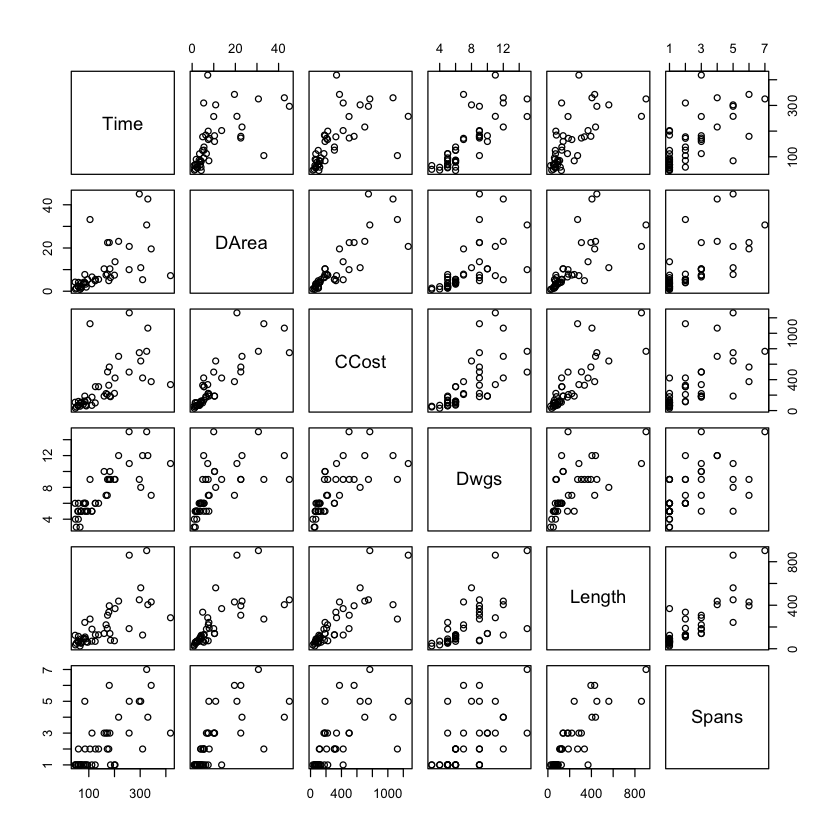

In [8]:
# Para ver si tiene sentido presentar un problema de regresión lineal
pairs(Time ~ DArea + CCost + Dwgs + Length + Spans, data = bridge, cex.labels = 1.4)

* Se observa que hay linealidad aunque aparece un abanico (dispersión). No hay homocedasticidad
* Conveniente transformar los datos

## Modelo

In [9]:
modelo <- lm(Time ~., data = bridge)

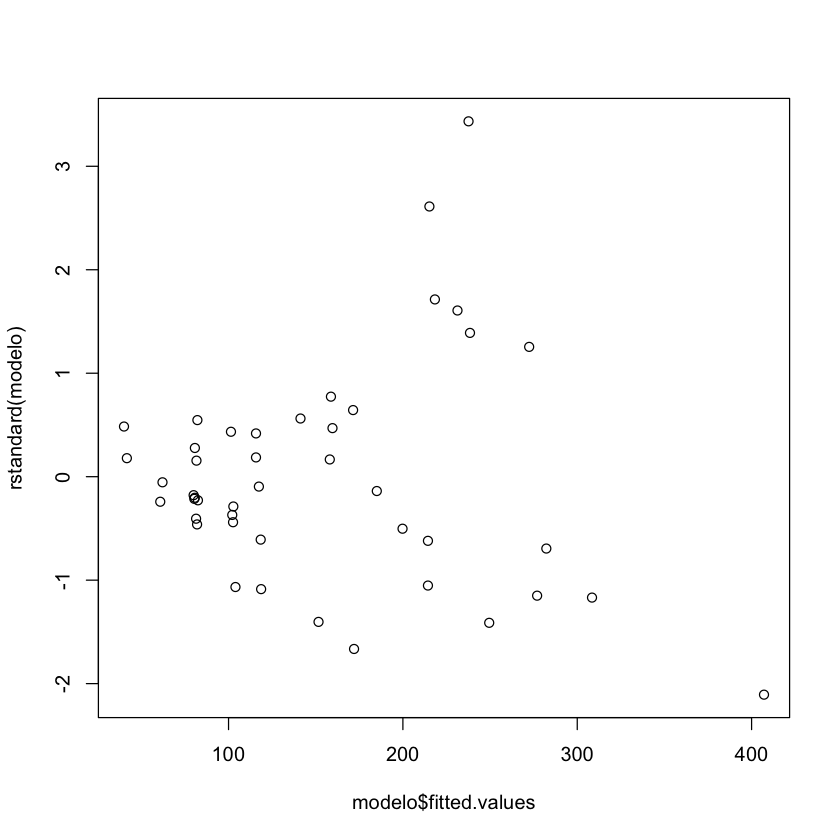

In [10]:
plot(modelo$fitted.values, rstandard(modelo))

* Esto evidencia heteroscedasaticidad. La transformación logaritmo puede resolver el problema
* Se transforman las variables, tanto la respuesta como las predictoras

## Transformación de variables

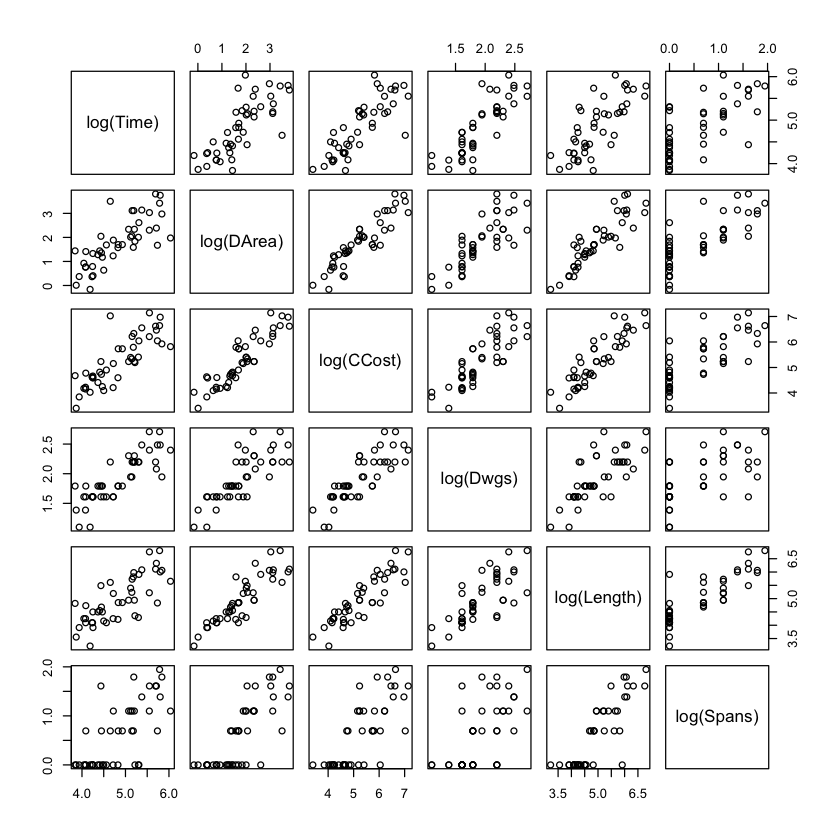

In [11]:
pairs(log(Time) ~ log(DArea) + log(CCost) + log(Dwgs) + log(Length) + log(Spans), data = bridge)

* Se observa que mejoro todo
* Se ve una linealidad mas presente entre la variable respuesta y las regresoras

## Rehago el modelo

In [12]:
# Hago mi modelo
modelo1 <- lm(log(Time) ~ log(DArea) + log(CCost) + log(Dwgs) + log(Length) + log(Spans), data = bridge)

## Análisis de los residuos

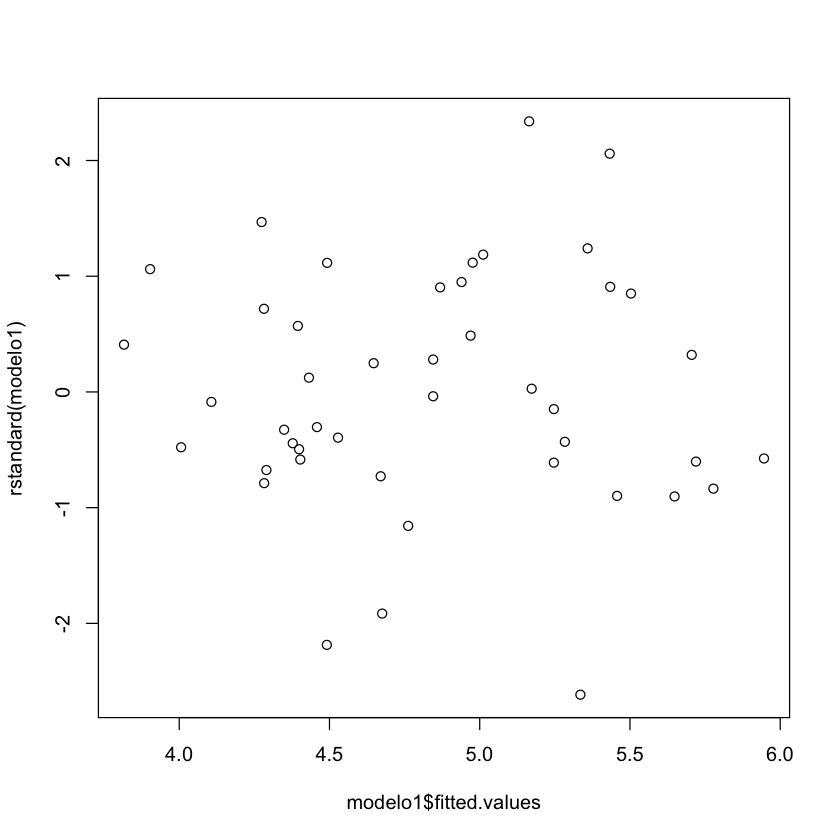

In [13]:
plot(modelo1$fitted.values, rstandard(modelo1))

* No se ve estructura
* Se ve aleatoriedad en este gráfico

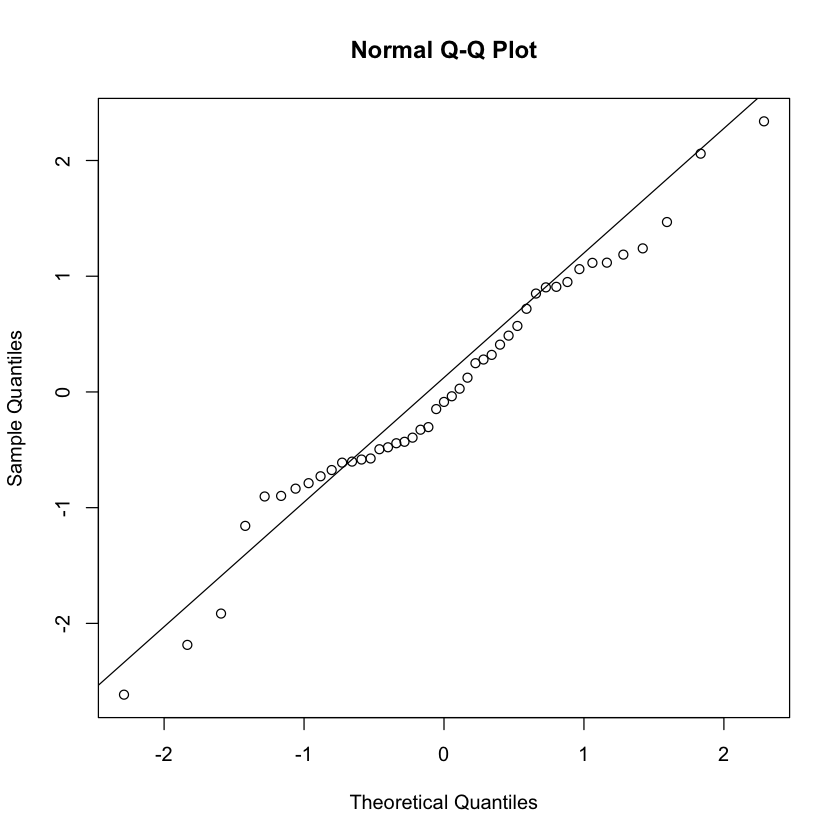

In [14]:
qqnorm(rstandard(modelo1))
qqline(rstandard(modelo1))

* Hay una normalidad bastante buena

## Test de Hipótesis

In [15]:
shapiro.test(rstandard(modelo1))


	Shapiro-Wilk normality test

data:  rstandard(modelo1)
W = 0.97692, p-value = 0.5005


* No se rechaza la hipótesis nula

## Rearmo data set con los datos transformados

In [16]:
# armo data set con los datos transformados
bridge.log <- log(bridge)

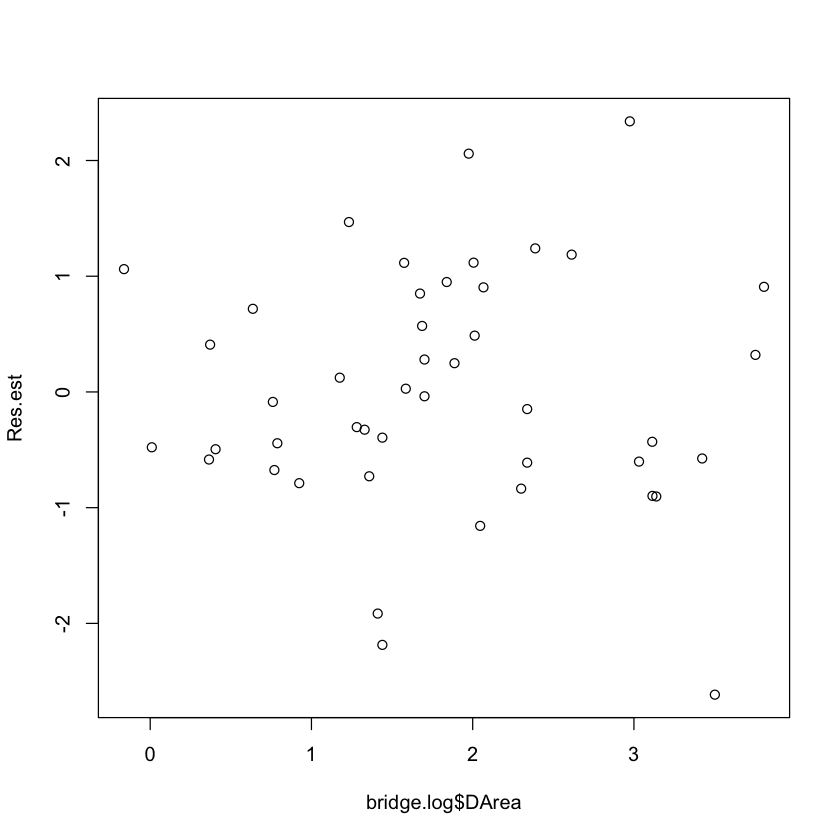

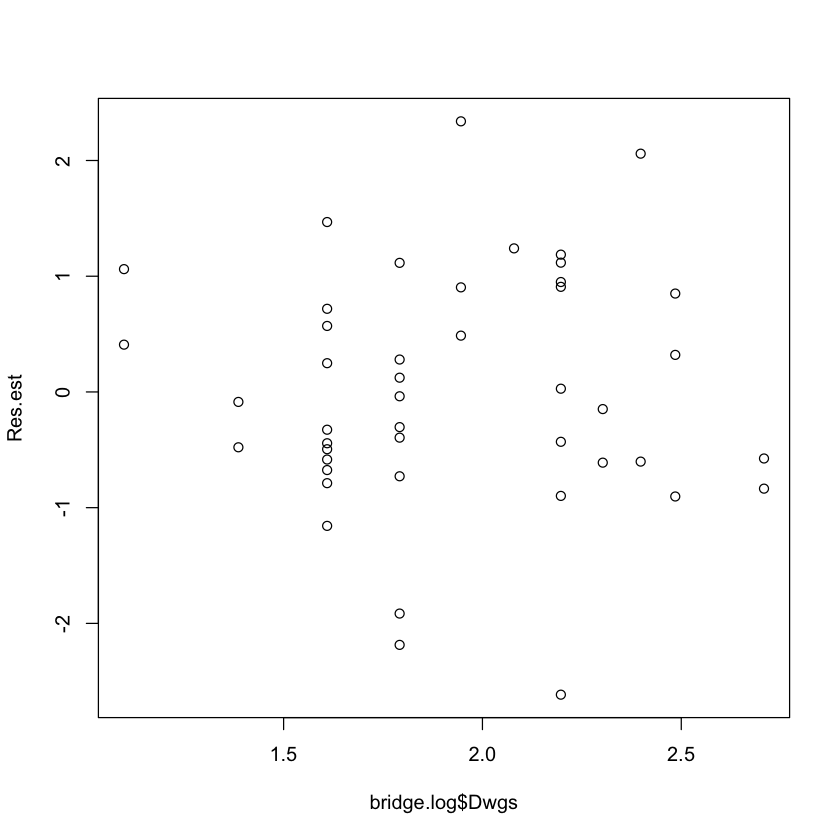

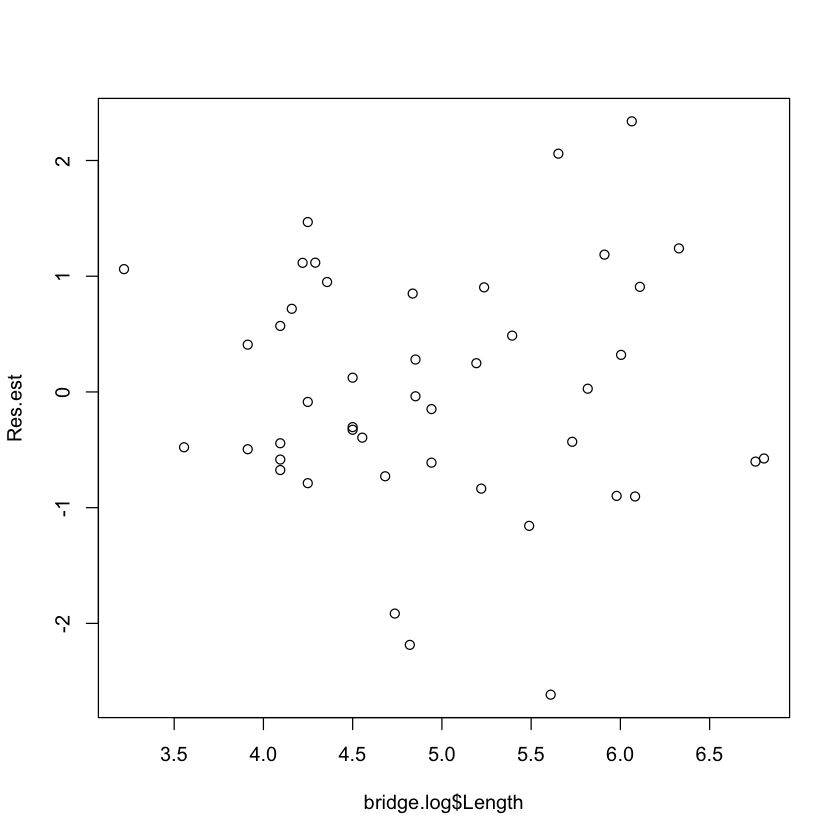

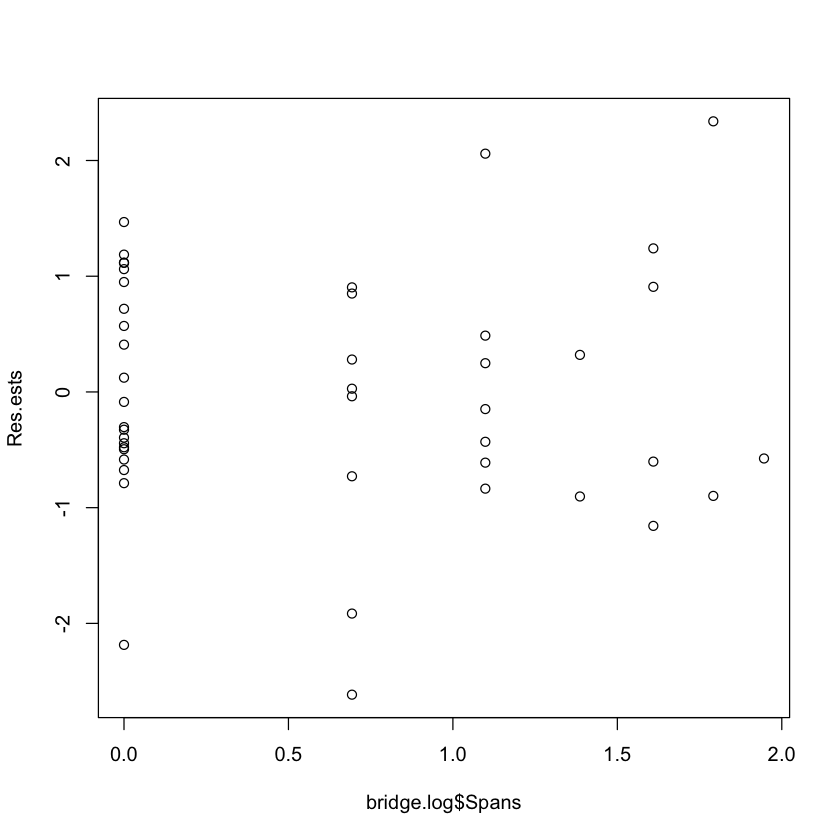

In [17]:
plot(bridge.log$DArea, rstandard(modelo1), ylab = "Res.est")
plot(bridge.log$Dwgs, rstandard(modelo1), ylab = "Res.est")
plot(bridge.log$Length, rstandard(modelo1), ylab = "Res.est")
plot(bridge.log$Spans, rstandard(modelo1), ylab = "Res.ests")

* En los 4 gráficos de residuos estandarizados se va bastante aleatoriedad
* Se concluye que plantear un problema de regresión lineal múltiple es razonable

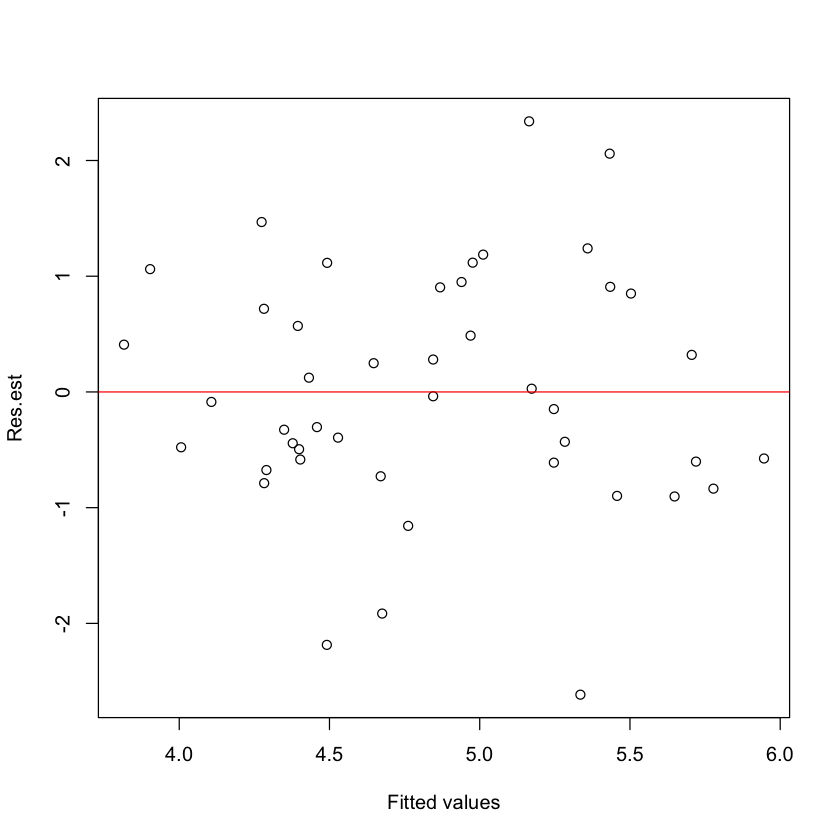

In [18]:
plot(modelo1$fitted.values, rstandard(modelo1), ylab = "Res.est", xlab = "Fitted values")
abline(0, 0, col = "red")

## Estudio de puntos influyentes

8         12         42         13         23         36          4 
0.03494091 0.04418682 0.04835323 0.04912290 0.05492884 0.05608044 0.05965468 
        35         16         20         31         37         30         21 
0.06270619 0.06376774 0.06766478 0.07214548 0.07490525 0.07577959 0.08189105 
         1         19          7         40         45         14         15 
0.08257672 0.08338499 0.09722122 0.10365239 0.10791451 0.10946711 0.10946711 
        26         18          5         43          3         11          6 
0.11165670 0.11620829 0.12340060 0.12926725 0.13009630 0.13165401 0.13510427 
        34         32         17         24         28         29         27 
0.13997477 0.14484874 0.15936864 0.16375769 0.17627719 0.17627719 0.18036388 
        44         38         33         41          9         25          2 
0.18281443 0.19354607 0.20129321 0.20336810 0.23057803 0.23780075 0.24735082 
        10         22         39 
0.27581280 0.30640239 0.36296594

2         9        10        22        25        39 
0.2473508 0.2305780 0.2758128 0.3064024 0.2378008 0.3629659

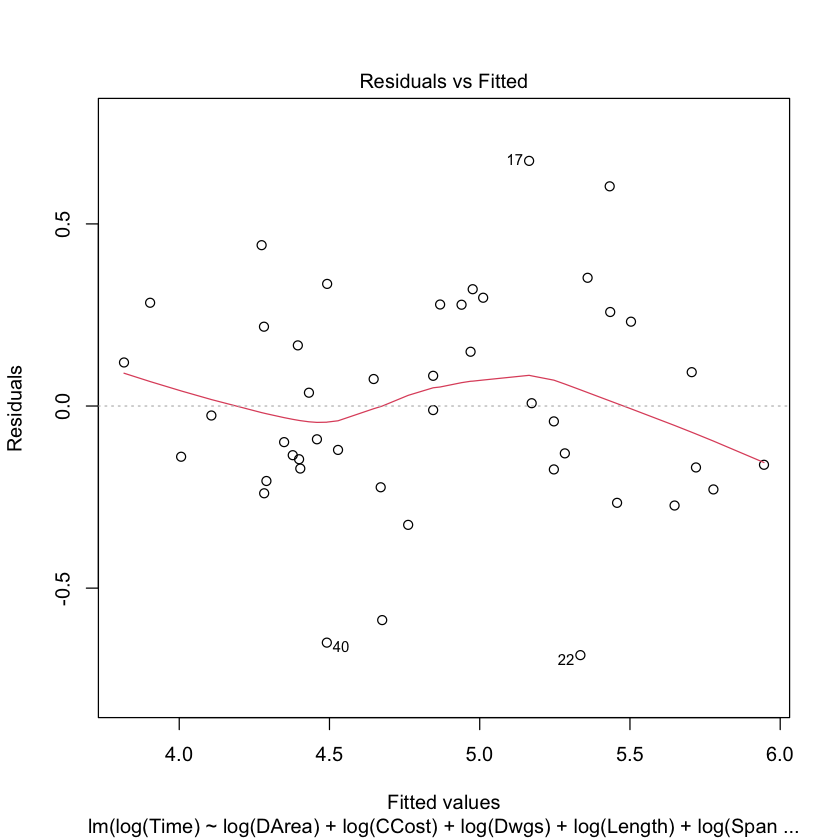

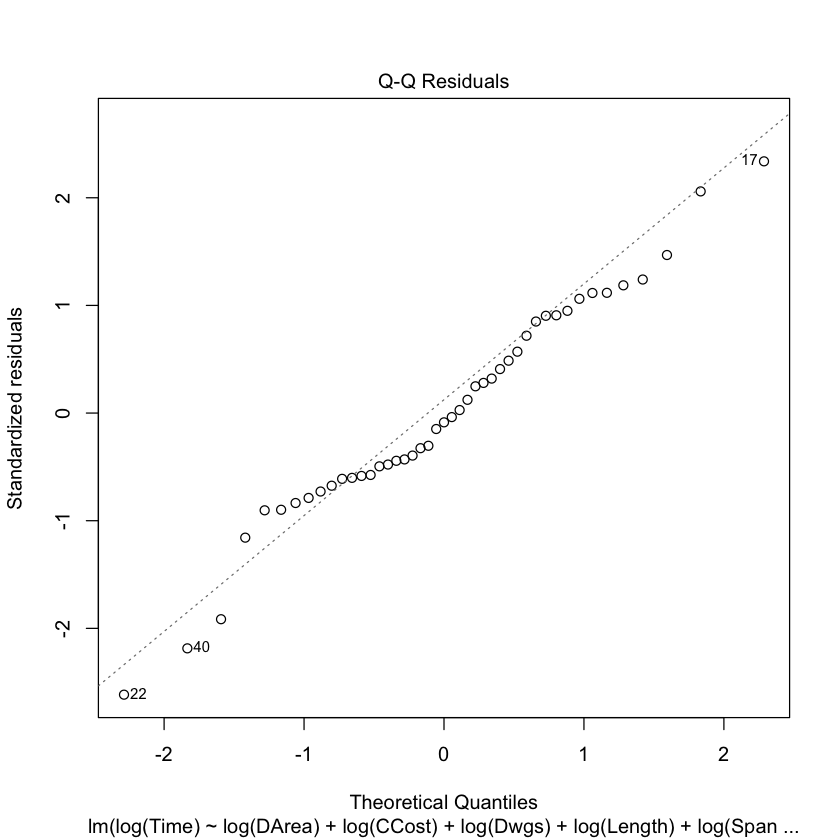

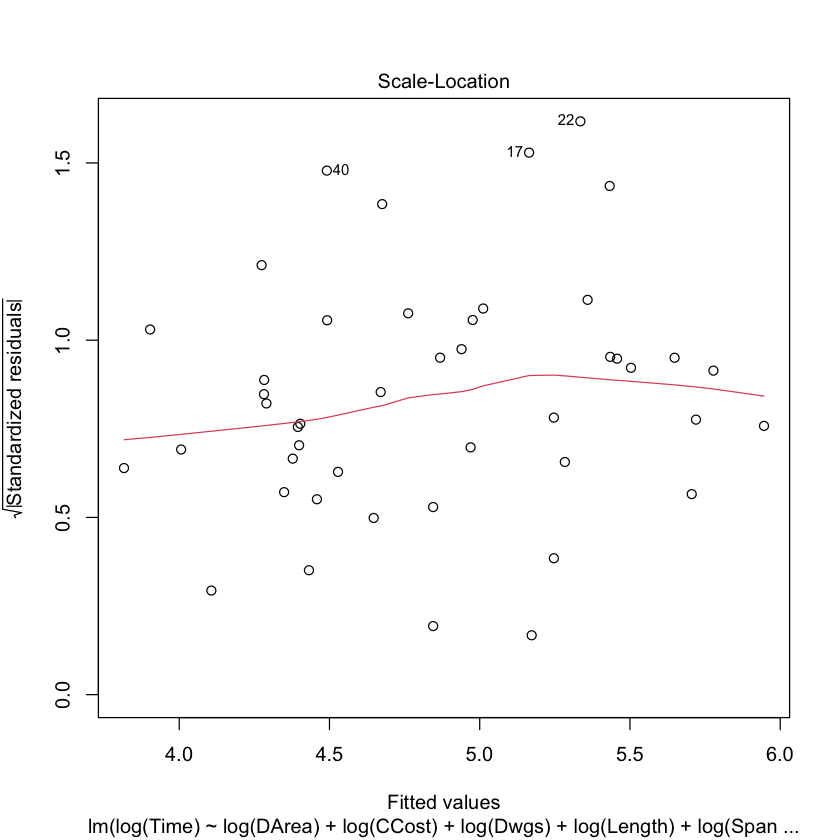

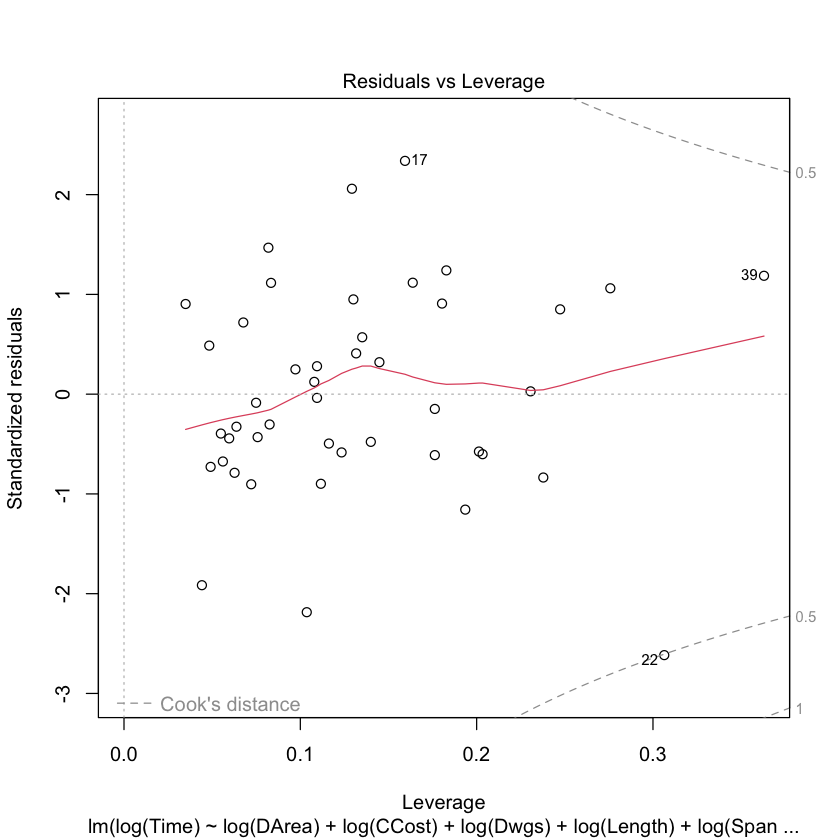

In [19]:
n <- nrow(bridge.log)
sort(hatvalues(modelo1))
hatvalues(modelo1)[hatvalues(modelo1)>2*5/n]

plot(modelo1)

* Se observa las siguientes observaciones:
    * **22**: alto leverage y un residuo grande
    * **39**: alto leverage y un residuo menor
    * **17**: no es alto leverage 

1            2            3            4            5            6 
1.385253e-03 3.959602e-02 2.248931e-02 2.078256e-03 8.003332e-03 8.467279e-03 
           7            8            9           10           11           12 
1.108250e-03 4.928333e-03 3.935736e-05 7.149292e-02 4.220224e-03 2.825687e-02 
          13           14           15           16           17           18 
4.572638e-03 1.607382e-03 2.875397e-05 1.208965e-03 1.727775e-01 5.369481e-03 
          19           20           21           22           23           24 
1.886789e-02 6.244217e-03 3.204522e-02 5.038289e-01 1.510731e-03 4.073309e-02 
          25           26           27           28           29           30 
3.630744e-02 1.690615e-02 3.025161e-02 1.331403e-02 7.822341e-04 2.535668e-03 
          31           32           33           34           35           36 
1.057510e-02 2.894375e-03 1.388678e-02 6.204804e-03 6.928937e-03 4.510109e-03 
          37           38           39           40           41           42 
1.003657e-04 5.357820e-02 1.337097e-01 9.207040e-02 1.541540e-02 2.004951e-03 
          43           44           45 
1.049044e-01 5.738342e-02 3.060054e-04

[1] 0.9069381

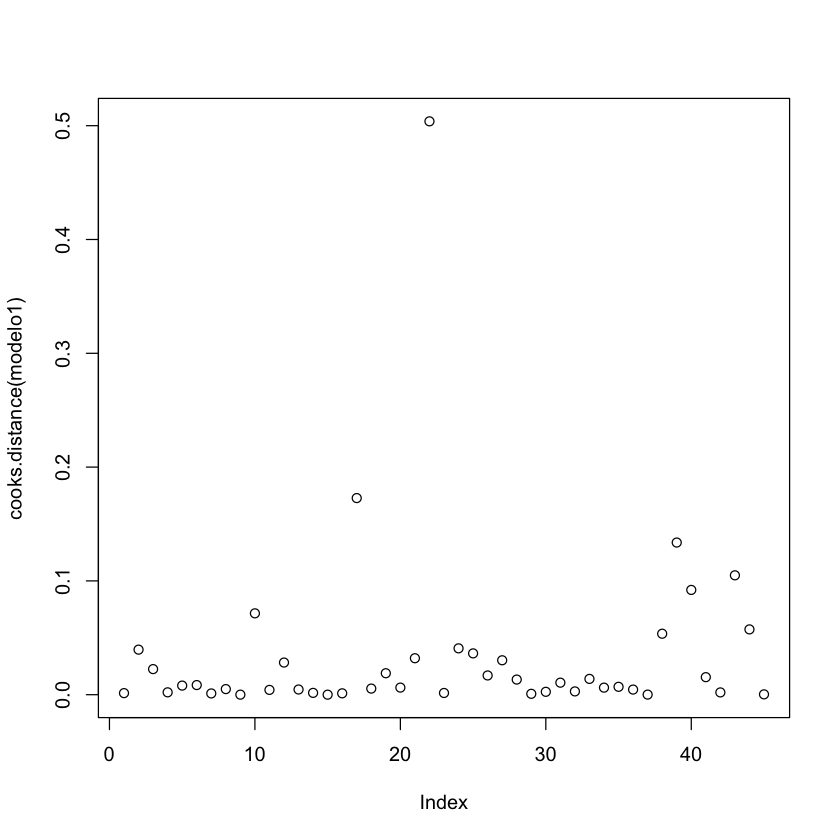

In [20]:
cooks.distance(modelo1)

p <- length(coef(modelo1)) 
leverage_umbral <- 2 * p / n
cooks_umbral <- qf(0.5,p,n-p)
cooks_umbral

plot(cooks.distance(modelo1))

named numeric(0)

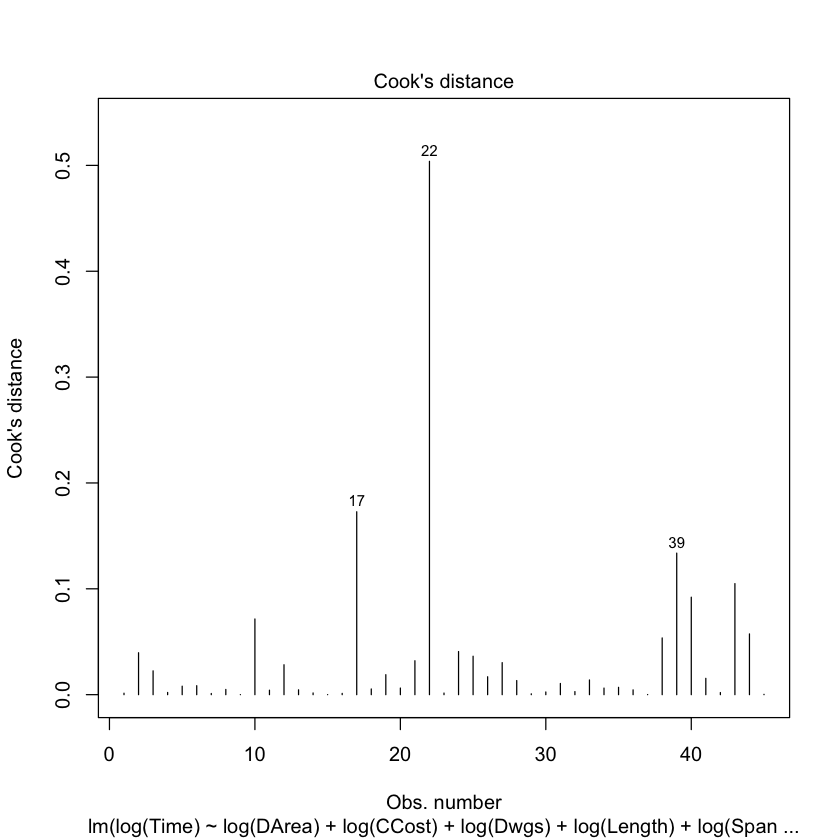

In [21]:
cooks.distance(modelo1)[cooks.distance(modelo1)>cooks_umbral]
plot(modelo1,which=4)

* Voy a estudiar el modelo, sacando la observación **22**
* Si bien no supera el umbral, su distancia de cook es mucho más grande que la del resto de las observaciones. La analizo

## Modelo sin la observación 22

In [22]:
bridge.sin <- bridge.log[-c(22),]

In [23]:
modelo2 <- lm(Time~ DArea + CCost + Dwgs + Length + Spans, data = bridge.sin)
summary(modelo1)
summary(modelo2)


Call:
lm(formula = log(Time) ~ log(DArea) + log(CCost) + log(Dwgs) + 
    log(Length) + log(Spans), data = bridge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68394 -0.17167 -0.02604  0.23157  0.67307 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.28590    0.61926   3.691 0.000681 ***
log(DArea)  -0.04564    0.12675  -0.360 0.720705    
log(CCost)   0.19609    0.14445   1.358 0.182426    
log(Dwgs)    0.85879    0.22362   3.840 0.000440 ***
log(Length) -0.03844    0.15487  -0.248 0.805296    
log(Spans)   0.23119    0.14068   1.643 0.108349    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3139 on 39 degrees of freedom
Multiple R-squared:  0.7762,	Adjusted R-squared:  0.7475 
F-statistic: 27.05 on 5 and 39 DF,  p-value: 1.043e-11



Call:
lm(formula = Time ~ DArea + CCost + Dwgs + Length + Spans, data = bridge.sin)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65083 -0.16863 -0.02491  0.18336  0.67671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.20522    0.57037   3.866 0.000419 ***
DArea        0.03444    0.11995   0.287 0.775612    
CCost        0.34056    0.14226   2.394 0.021710 *  
Dwgs         0.67425    0.21570   3.126 0.003391 ** 
Length      -0.11702    0.14512  -0.806 0.425045    
Spans        0.13577    0.13369   1.016 0.316287    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2888 on 38 degrees of freedom
Multiple R-squared:  0.8151,	Adjusted R-squared:  0.7907 
F-statistic: 33.49 on 5 and 38 DF,  p-value: 6.076e-13


* Cambió la significatividad de la variable CCost, el Ra mejoró, cambió la estimación de algunos parámetros.
* Me quedo con los datos sin la observación 22

## Análisis multicolinealidad

In [24]:
vif(modelo2)

DArea    CCost     Dwgs   Length    Spans 
7.073162 8.961931 3.705488 8.204114 4.138030

* Hay multicolinealidad severa
* Hacemos selección de variables, y vemos cómo queda el modelo elegido

## Selección de variables y validación cruzada

In [25]:
# Seleccion de variables
head(bridge.sin)

,Time,DArea,CCost,Dwgs,Length,Spans
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.366913,1.2809338,4.411585,1.791759,4.499810,0.0000000
2,5.734958,1.6733512,6.045716,2.484907,4.836282,0.6931472
3,5.217649,1.8389611,5.191845,2.197225,4.356709,0.0000000
4,4.242765,0.7884574,4.605170,1.609438,4.094345,0.0000000
5,4.231204,0.3646431,4.634729,1.609438,4.094345,0.0000000
6,4.561218,1.6863990,4.900820,1.609438,4.094345,0.0000000


In [26]:
ajuste_full <- lm(Time~., data = bridge.sin)

cant.var = length(ajuste_full$coefficients) - 1
cant.var

[1] 5

In [27]:
# División 80/20
set.seed(12)
train_index <- createDataPartition(bridge.sin$Time, p = 0.8, list = FALSE)
train_data <- bridge.sin[train_index, ]
test_data <- bridge.sin[-train_index, ]

In [28]:
# Elijo variables sobre el 80% de los datos
# Ajuste de modelos con regsubsets
# por default hace el metodo exhaustivo. Opciones: method="backward" o method="backward")

# metodo exhaustivo
ajuste.regsub <- regsubsets(Time ~ ., data = train_data, nvmax = cant.var) # por default es exhaustivo
resumen <- summary(ajuste.regsub)

In [29]:
# Crear tabla resumen
tabla <- data.frame(
  Variables = 1:cant.var,
  R2_ajustado = resumen$adjr2,
  BIC = resumen$bic
)

knitr::kable(tabla, digits = 3)



| Variables| R2_ajustado|     BIC|
|---------:|-----------:|-------:|
|         1|       0.785| -49.227|
|         2|       0.805| -50.232|
|         3|       0.810| -48.708|
|         4|       0.811| -46.356|
|         5|       0.807| -43.291|

In [30]:
# Identificar el mejor modelo según cada criterio
mejor_R2 <- which.max(resumen$adjr2)
mejor_BIC <- which.min(resumen$bic)

cat("Mejor R2 ajustado →", mejor_R2, "variables\n")
cat("Mejor BIC         →", mejor_BIC, "variables\n")

Mejor R2 ajustado → 4 variables
Mejor BIC         → 2 variables


### Modelo BIC

In [31]:
# Control de validación cruzada 5-fold en el conjunto de entrenamiento
variables_bic <- names(coef(ajuste.regsub, mejor_BIC))[-1]  # quitamos intercept
variables_bic

formula_bic <- as.formula(paste("Time ~", paste(variables_bic, collapse = "+")))
formula_bic

control <- trainControl(method = "cv", number = 5)

# Entrenar modelo lineal con validación cruzada en train_data
cv.bic <- train(formula_bic, data = train_data, method = "lm", trControl = control)

# Resultados entrenamiento con CV
cv.bic

[1] "CCost" "Dwgs"

Time ~ CCost + Dwgs

Linear Regression 

36 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 28, 28, 30, 29, 29 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2857766  0.8389306  0.2218299

Tuning parameter 'intercept' was held constant at a value of TRUE

*  Se consideran valores buenos, los valores chicos!
*  R^2 tiene que ser cercano a 1

### Modelo R2

In [32]:
variables_R2 <- names(coef(ajuste.regsub, mejor_R2))[-1]  # quitamos intercept
variables_R2

formula_R2 <- as.formula(paste("Time ~", paste(variables_R2, collapse = "+")))
formula_R2
control <- trainControl(method = "cv", number = 5)

# Entrenar modelo lineal con validación cruzada en train_data
cv.R2 <- train(formula_R2, data = train_data, 
               method = "lm", trControl = control)

# Resultados entrenamiento con CV
cv.R2

[1] "DArea"  "CCost"  "Dwgs"   "Length"

Time ~ DArea + CCost + Dwgs + Length

Linear Regression 

36 samples
 4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 29, 30, 28, 29, 28 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2628759  0.8416698  0.2049692

Tuning parameter 'intercept' was held constant at a value of TRUE

## Estimación final de parámetros y predicción en conjunto de test

### Modelo BIC


Call:
lm(formula = formula_bic, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69858 -0.17185 -0.01045  0.19906  0.69880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.74024    0.26385   6.596 1.69e-07 ***
CCost        0.42383    0.09234   4.590 6.14e-05 ***
Dwgs         0.45580    0.21522   2.118   0.0418 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2749 on 33 degrees of freedom
Multiple R-squared:  0.8162,	Adjusted R-squared:  0.8051 
F-statistic: 73.28 on 2 and 33 DF,  p-value: 7.268e-13


CCost     Dwgs 
3.491223 3.491223

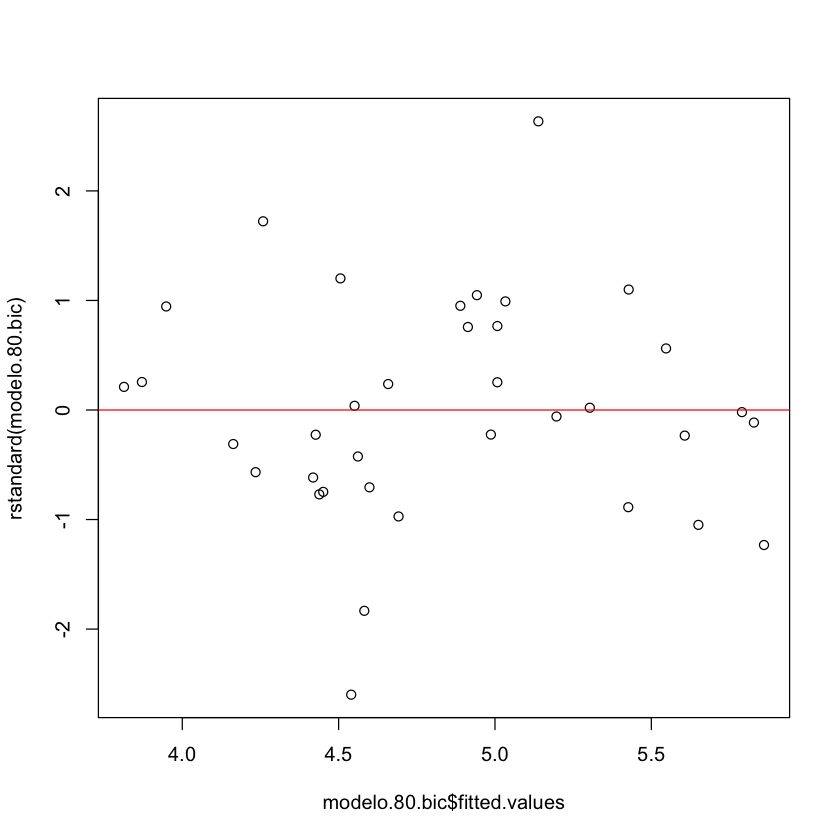

RMSE final en conjunto test (20%): 0.3310931 


Linear Regression 

36 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 28, 28, 30, 29, 29 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2857766  0.8389306  0.2218299

Tuning parameter 'intercept' was held constant at a value of TRUE

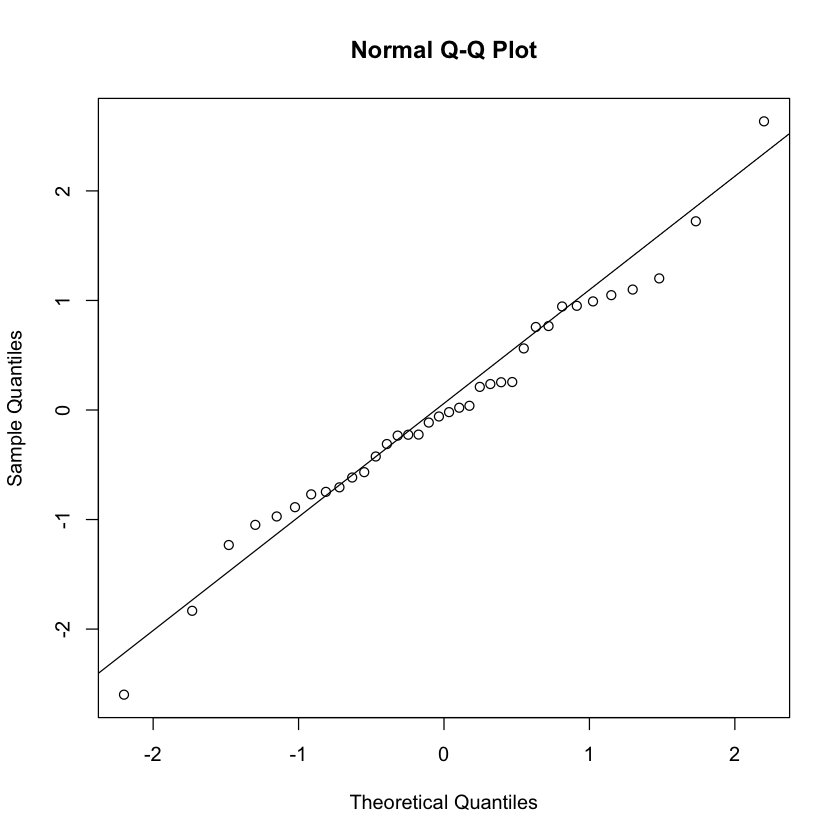

In [33]:
# Si elegimos BIC

## Estimamos los parametros con el 80%
modelo.80.bic<-lm(formula_bic, data=train_data)
summary(modelo.80.bic)
vif(modelo.80.bic)

# validez del modelo
plot(modelo.80.bic$fitted.values,rstandard(modelo.80.bic))
abline(0,0,col="red")

qqnorm(rstandard(modelo.80.bic))
qqline(rstandard(modelo.80.bic))

# terminar de validar el modelo

####################
# Prediccion

# Obtener solo las variables necesarias para test_data
vars_mejor.bic <- all.vars(formula_bic)
test_data_filtrado.bic <- test_data[vars_mejor.bic]

# Predecir con el modelo ganador sobre las variables correctas

test.df<-data.frame(test_data_filtrado.bic[,-1]) #saco la variable respuesta
predicciones_test.bic <- predict(modelo.80.bic, newdata = test.df)

# Calcular RMSE en test_data
rmse_final.bic <- sqrt(mean((test_data_filtrado.bic$Time - predicciones_test.bic)^2))
cat("RMSE final en conjunto test (20%):", rmse_final.bic, "\n")
cv.bic

# no difiere mucho del RMSE obtenido en el entrenamiento
# no hay evidencia de overfitting

### Modelo R2


Call:
lm(formula = formula_R2, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67583 -0.13863 -0.00983  0.18147  0.63765 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4646     0.5020   4.910 2.78e-05 ***
DArea         0.2043     0.1238   1.650   0.1090    
CCost         0.3921     0.1572   2.494   0.0182 *  
Dwgs          0.3254     0.2253   1.444   0.1587    
Length       -0.1367     0.1316  -1.039   0.3070    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2709 on 31 degrees of freedom
Multiple R-squared:  0.8323,	Adjusted R-squared:  0.8106 
F-statistic: 38.45 on 4 and 31 DF,  p-value: 1.332e-11



Call:
lm(formula = Time ~ ., data = bridge.sin)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65083 -0.16863 -0.02491  0.18336  0.67671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.20522    0.57037   3.866 0.000419 ***
DArea        0.03444    0.11995   0.287 0.775612    
CCost        0.34056    0.14226   2.394 0.021710 *  
Dwgs         0.67425    0.21570   3.126 0.003391 ** 
Length      -0.11702    0.14512  -0.806 0.425045    
Spans        0.13577    0.13369   1.016 0.316287    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2888 on 38 degrees of freedom
Multiple R-squared:  0.8151,	Adjusted R-squared:  0.7907 
F-statistic: 33.49 on 5 and 38 DF,  p-value: 6.076e-13


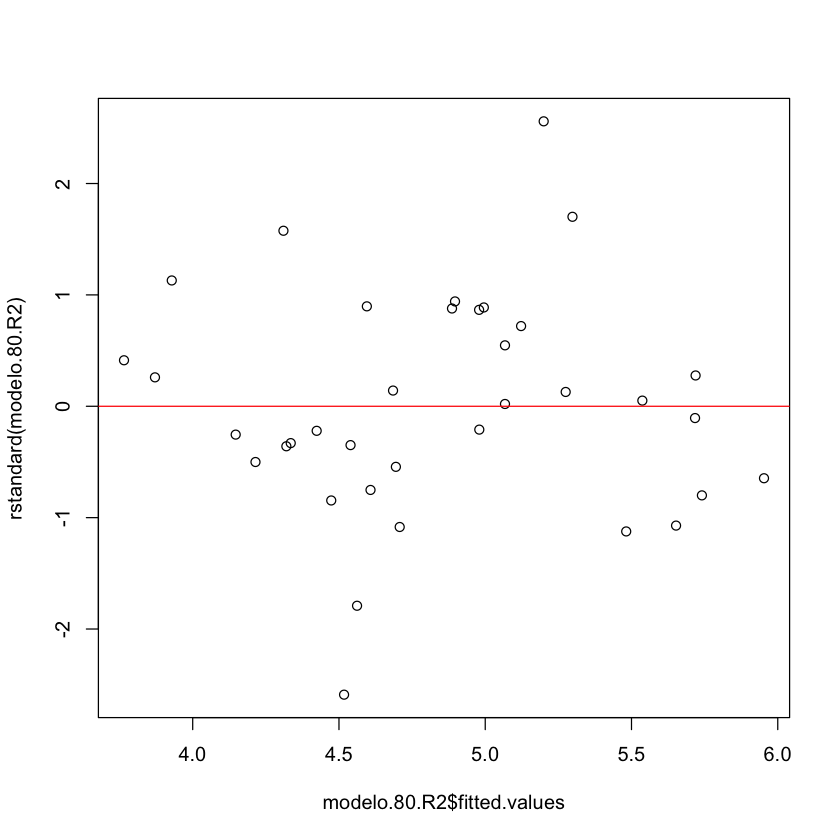

RMSE final en conjunto test (20%): 0.3966305 


Linear Regression 

36 samples
 4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 29, 30, 28, 29, 28 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2628759  0.8416698  0.2049692

Tuning parameter 'intercept' was held constant at a value of TRUE

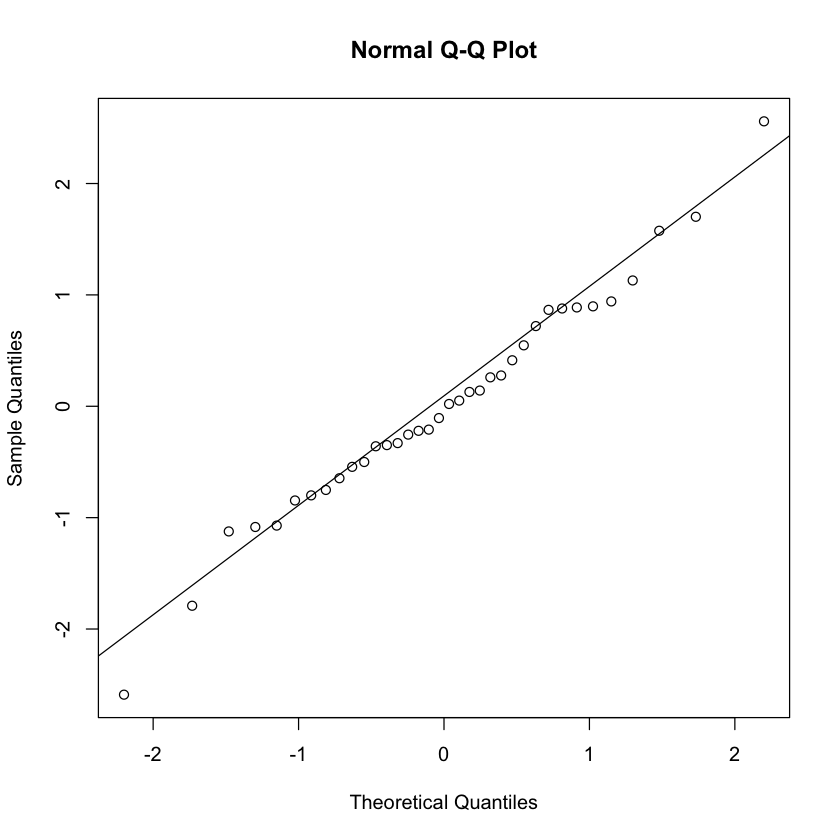

In [34]:
# Predicción en test_data
# Si elegimos R2

## Estimamos los parametros con el 80%
modelo.80.R2<-lm(formula_R2, data=train_data)
summary(modelo.80.R2)

#comparo con el modelo completo
summary(ajuste_full)

# validez del modelo
plot(modelo.80.R2$fitted.values,rstandard(modelo.80.R2))
abline(0,0,col="red")

qqnorm(rstandard(modelo.80.R2))
qqline(rstandard(modelo.80.R2))

# terminar de validar el modelo

# Obtener solo las variables necesarias para test_data
vars_mejor.R2 <- all.vars(formula_R2)
test_data_filtrado.R2 <- test_data[vars_mejor.R2]

# Predecir con el modelo ganador sobre las variables correctas

test.df.R2<-data.frame(test_data_filtrado.R2[,-1]) #saco la variable respuesta
predicciones_test.R2 <- predict(modelo.80.R2, newdata = test.df.R2)

# Calcular RMSE en test_data
rmse_final.R2 <- sqrt(mean((test_data_filtrado.R2$Time - predicciones_test.R2)^2))
cat("RMSE final en conjunto test (20%):", rmse_final.R2, "\n")
cv.R2

### Tabla Resumen

In [35]:
# Crear tabla resumen
tabla.CV <- data.frame(
  CV_BIC = cv.bic$results$RMSE[1],
  RMSE_bic = rmse_final.bic,
  CV_R2 = cv.R2$results$RMSE[1],
  RMSE_R2 = rmse_final.R2
)

knitr::kable(tabla.CV, digits = 3)



| CV_BIC| RMSE_bic| CV_R2| RMSE_R2|
|------:|--------:|-----:|-------:|
|  0.286|    0.331| 0.263|   0.397|

* Se observa que BIC tiene un mejor comportamiento en la muestra de test que R2

### Modelo AIC

In [36]:
## Seleccion de variables
## AIC

modelo_full <- lm(Time ~ ., data = bridge.sin)
modelo_nulo <- lm(Time ~ 1, data = bridge.sin)

step_model <- stepAIC(modelo_nulo, scope = list(lower = modelo_nulo, upper = modelo_full), direction = "both", trace = FALSE)

summary(step_model)


Call:
lm(formula = Time ~ CCost + Dwgs, data = bridge.sin)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72446 -0.17983 -0.03792  0.19606  0.72310 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.70635    0.24731   6.900 2.28e-08 ***
CCost        0.35825    0.08566   4.182 0.000148 ***
Dwgs         0.66042    0.20199   3.270 0.002186 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2827 on 41 degrees of freedom
Multiple R-squared:  0.8088,	Adjusted R-squared:  0.7995 
F-statistic: 86.74 on 2 and 41 DF,  p-value: 1.855e-15


* Veo que me devuelve el mismo modelo que el BIC

In [37]:
variables_AIC <- names(coef(step_model))[-1]  # quitamos intercept
variables_AIC

[1] "CCost" "Dwgs"

In [38]:
formula_AIC <- as.formula(paste("Time ~", paste(variables_AIC, collapse = "+")))
formula_AIC
formula_bic

# El mismo que BIC. Elijo modelo BIC y hago todo el análisis de 
# la validez de los supuestos del modelo

Time ~ CCost + Dwgs

Time ~ CCost + Dwgs